<h1>Импорт библиотек

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [14]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result


def test(matrices, vectors, answer):
    result = sum_prod(matrices, vectors)
    print("Test was successful" if np.array_equal(result, answer) else "Test failed")

matrices = [np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]]), np.array([[4, 4, 4], [5, 5, 5], [6, 6, 6]])]
vectors = [np.array([[7], [8], [9]]), np.array([[1], [2], [3]])]
expected_answer = [[48], [78], [108]]

test(matrices, vectors, expected_answer)

Test was successful


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [15]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

def test(M, answer):
    result = binarize(M)
    print("Test was successful" if np.array_equal(result, answer) else "Test failed")

test(np.array([[0.4, 0.6, 0.8], [1, 2, 0.3], [0.4, 0.7, 0.9]]), np.array([[0, 1, 1], [1, 1, 0], [0, 1, 1]]))

Test was successful


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [16]:
def unique_rows(mat):
    return [list(np.unique(row)) for row in mat]

def unique_columns(mat):
    return [list(np.unique(column)) for column in np.transpose(mat)]


def test(matrix, answer1, answer2):
    result1 = unique_rows(matrix)
    result2 = unique_columns(matrix)
    print("Test was successful" if result1 == answer1 and result2 == answer2 else "Test failed")


matrix = [
    [1, 2, 3, 4, 5],
    [2, 2, 2, 2, 2],
    [3, 3, 3, 4, 4],
    [5, 6, 7, 8, 9],
    [1, 2, 2, 3, 3]
]
expected_answer1 = [[1, 2, 3, 4, 5], [2], [3, 4], [5, 6, 7, 8, 9], [1, 2, 3]]
expected_answer2 = [[1, 2, 3, 5], [2, 3, 6], [2, 3, 7], [2, 3, 4, 8], [2, 3, 4, 5, 9]]

test(matrix, expected_answer1, expected_answer2)

Test was successful


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

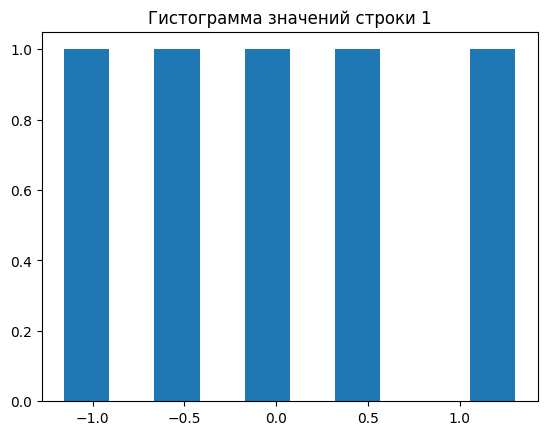

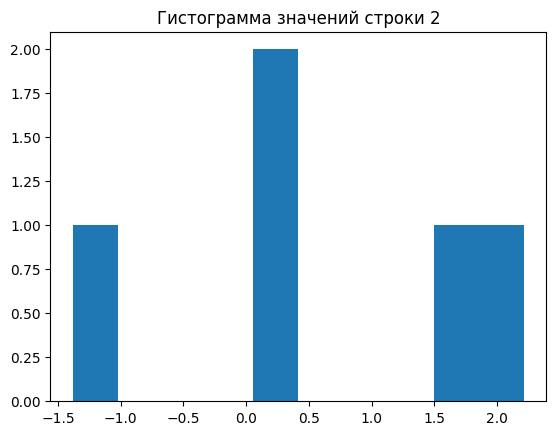

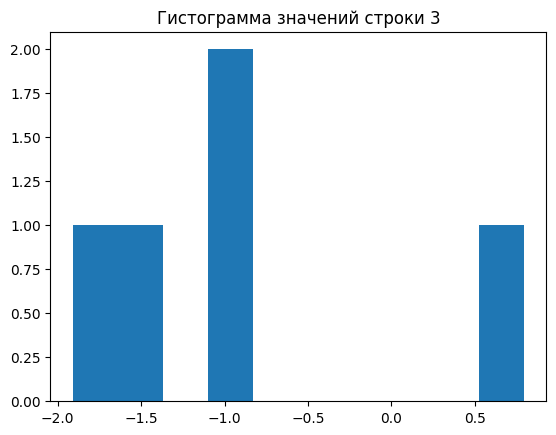

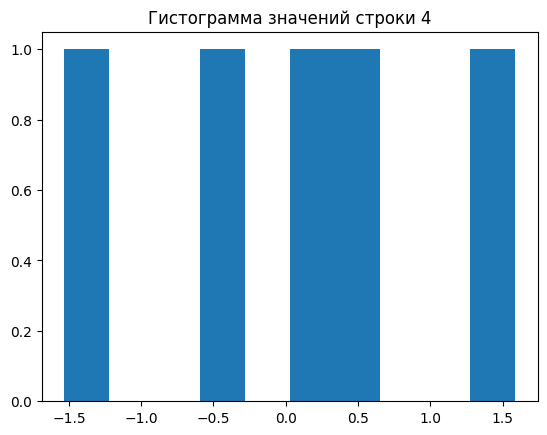

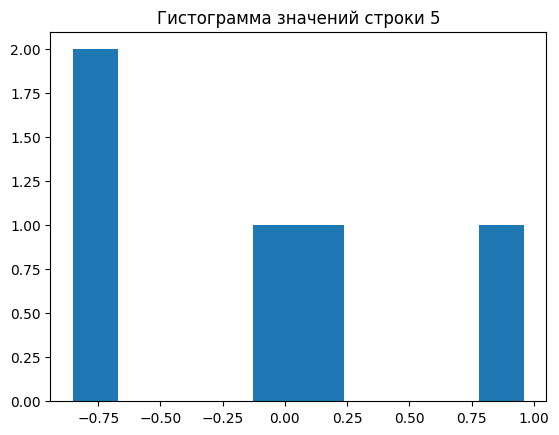

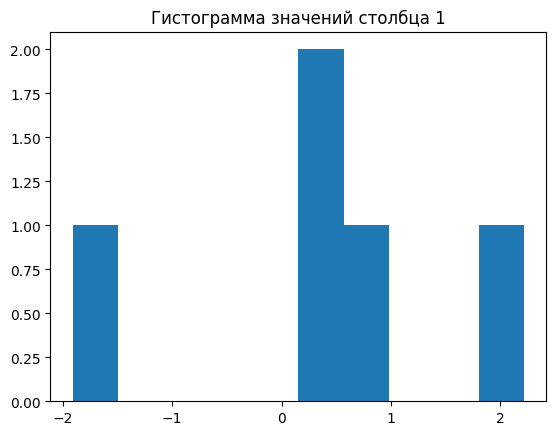

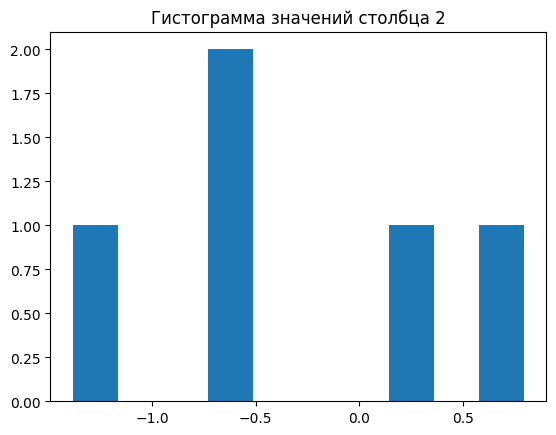

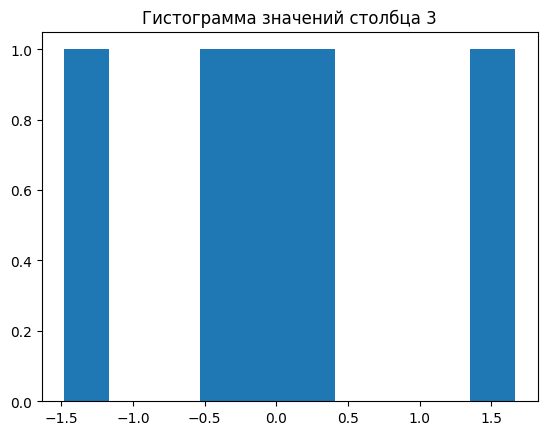

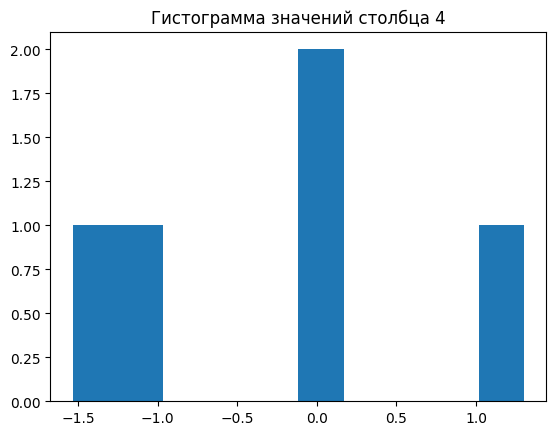

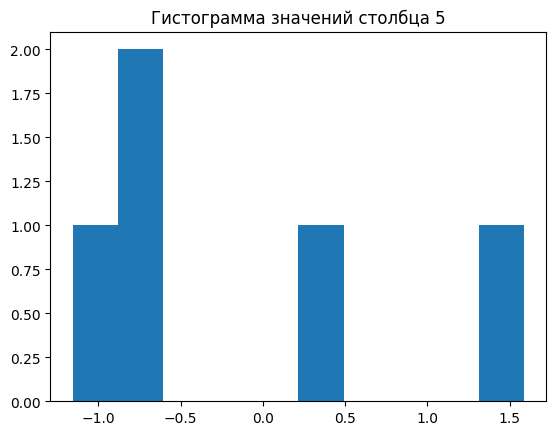

(array([ 0.44638873, -0.32207446, -0.07483762, -0.24847684, -0.1985038 ]),
 array([1.78693913, 0.56643284, 1.04362995, 0.98500386, 1.04121206]),
 array([-0.01373018,  0.57248942, -0.9090988 ,  0.04565538, -0.09281981]),
 array([0.72590673, 1.60703765, 0.85092178, 1.07121113, 0.41278734]))

In [17]:
def generate_random_normal_matrix(m, n):
    matrix = np.random.randn(m, n)

    columns_means = np.mean(matrix, axis=0)  # математическое ожидание для столбцов
    columns_vars = np.var(matrix, axis=0)  # дисперсия для столбцов
    row_means = np.mean(matrix, axis=1)  # математическое ожидание для строк
    row_vars = np.var(matrix, axis=1)  # дисперсия для строк
    plot_histograms(matrix)
    return columns_means, columns_vars, row_means, row_vars


def plot_histograms(matrix):
    row_count, column_count = matrix.shape

    for i in range(row_count):
        plt.hist(matrix[i, :], bins=10)
        plt.title(f"Гистограмма значений строки {i + 1}")
        plt.show()

    for i in range(column_count):
        plt.hist(matrix[:, i], bins=10)
        plt.title(f"Гистограмма значений столбца {i + 1}")
        plt.show()


generate_random_normal_matrix(5, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [18]:
def chess(m, n, a, b):
    return [[a if (i + j) % 2 == 0 else b for i in range(n)] for j in range(m)]

def test(m, n, a, b, answer):
    result = chess(m, n, a, b)
    print("Test was successful" if result == answer else "Test failed")

expected_answer = [
    [1, 2, 1, 2],
    [2, 1, 2, 1],
    [1, 2, 1, 2]
]

test(3, 4, 1, 2, expected_answer)

Test was successful


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

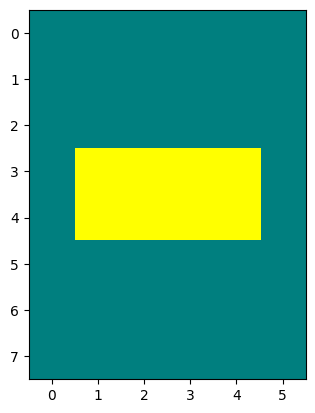

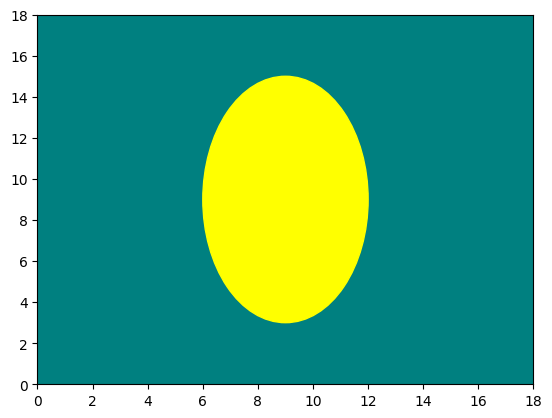

In [19]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((n, m, 3)) * background_color
    top = (n - b) // 2
    left = (m - a) // 2
    image[top: top + b, left: left + a] = rectangle_color
    plt.imshow(image)
    plt.show()


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot()

    background = Rectangle((0, 0), m, n, color=background_color)
    ellipse = Ellipse((m / 2, n / 2), a * 2, b * 2, color=ellipse_color)

    ax.add_patch(background)
    ax.add_patch(ellipse)
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.show()


draw_rectangle(4, 2, 6, 8, (1, 1, 0), (0, 0.5, 0.5))
draw_ellipse(3, 6, 18, 18, (1, 1, 0), (0, 0.5, 0.5))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [20]:
def analyze_list(data, p):
    mean = np.mean(data)  # математическое ожидание
    var = np.var(data)  # дисперсия
    std = np.std(data)  # ско
    local_max = [data[i] for i in range(1, len(data) - 1) if data[i - 1] < data[i] > data[i + 1]]
    local_min = [data[i] for i in range(1, len(data) - 1) if data[i - 1] > data[i] < data[i + 1]]
    moving_average_data = np.convolve(data, np.ones(p) / p, mode='valid')
    return mean, var, std, local_max, local_min, moving_average_data


def test(data, p):
    mean, var, std, local_max, local_min, moving_average_data = analyze_list(data, p)
    print(f"Математическое ожидание: {mean}")
    print(f"Дисперсия: {var}")
    print(f"СКО: {std}")
    print(f"Локальные максимумы: {local_max}")
    print(f"Локальные минимумы: {local_min}")
    print(f"Скользящее среднее: {moving_average_data}")


test(np.array([1, 2, 1, 2, 1, 1, 3, 1]), 4)

Математическое ожидание: 1.5
Дисперсия: 0.5
СКО: 0.7071067811865476
Локальные максимумы: [2, 2, 3]
Локальные минимумы: [1]
Скользящее среднее: [1.5  1.5  1.25 1.75 1.5 ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [21]:
def one_hot_encode(labels):
    num_classes = len(set(labels))
    encoded = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded[i, label] = 1
    return encoded


print(one_hot_encode([0, 1, 2, 3, 4, 1, 2, 3, 1]))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]
